### Laboratorio 5 - Modelos basados en agentes
- Paola De Leon 20361
- Gabrieala Contreras 20213

In [1]:
import os
import numpy as np
import random as rand 
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Image as IPImage

*Ejercico 1*

*Ejercico 2*

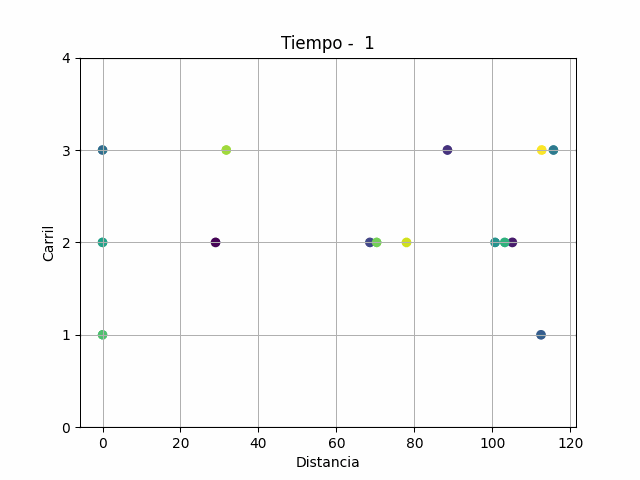

<Figure size 640x480 with 0 Axes>

In [3]:
class Vehiculo:
    def __init__(self, behavior="agresivo", limite_velocidad=120):
        self.velocidad = rand.uniform(5, limite_velocidad)
        self.posicion = 0
        self.reccord = []  # Lista para registrar la posición y el carril
        self.behavior = behavior
        self.limite_velocidad = limite_velocidad
        self.num_carriles = None 

    def acelerar(self, limite):
        if self.velocidad < limite:
            self.velocidad += rand.uniform(5, 15)
        else:
            self.frenar()

    def frenar(self):
        if self.velocidad > 0:
            self.velocidad -= rand.uniform(5, 15)
        else:
            self.velocidad = 0

    def cambio_Carril(self):
        carril_actual = rand.randint(1, 3)
        if self.behavior == "agresivo":
            if rand.random() < 0.5:  
                self.posicion += self.velocidad + rand.uniform(1, 4)
                nRand = rand.randint(1, 3)
                carril_actual = nRand
        elif self.behavior == "cauteloso":
            if rand.random() > 0.3:  
                self.posicion += max(self.velocidad - 1, 0)
                carril_actual = 2
        

        self.reccord.append((round(self.posicion, 4), carril_actual))

class Autopista:
    def __init__(self, num_carriles=3, limite_velocidad=120):
        self.num_carriles = num_carriles
        self.limite_velocidad = limite_velocidad
        self.vehiculos = []

    def agregar_vehiculo(self, behavior="agresivo", limite_velocidad=120):
        vehiculo = Vehiculo(behavior, limite_velocidad)
        vehiculo.num_carriles = self.num_carriles  # Asignar el número de carriles al vehículo
        self.vehiculos.append(vehiculo)

    def simular_trafico(self, tiempo_simulacion):
        for _ in range(tiempo_simulacion):
            for vehiculo in self.vehiculos:
                vehiculo.acelerar(self.limite_velocidad)
                vehiculo.cambio_Carril()
                vehiculo.reccord.append((round(vehiculo.posicion, 4), vehiculo.reccord[-1][1]))  # Registrar posición y carril actual



autopista = Autopista(num_carriles=3, limite_velocidad=120)
num_carros = 15
registro = []

comportamientos = ["agresivo", "cauteloso"]


for _ in range(num_carros):
    behavior = comportamientos[_ % len(comportamientos)]
    autopista.agregar_vehiculo(behavior=behavior)

tiempo_simulacion = 70
autopista.simular_trafico(tiempo_simulacion)


for vehiculo in autopista.vehiculos:
    registro.append(vehiculo.reccord)


num_elementos = len(registro[0])
data_g = []

# Acceder a los elementos en orden
for i in range(num_elementos):
    elementos_i = [subarray[i] for subarray in registro]
    if elementos_i not in data_g:
        data_g.append(elementos_i)


# Crear un gráfico
for i, subarray in enumerate(data_g):
    x = [tupla[0] for tupla in subarray]
    y = [tupla[1] for tupla in subarray]

    colores_punto = np.arange(len(subarray))

    # Crear un gráfico de dispersión con colores únicos
    plt.scatter(x, y, c=colores_punto, cmap='viridis', marker='o', label=f'Array {i + 1}')
  
    plt.xlabel('Distancia')
    plt.ylabel('Carril')
    plt.title(f'Tiempo -  {i + 1}')
    plt.grid(True)
    plt.yticks(range(5))
    
    nombre_archivo = os.path.join("img_ej2", f"grafico_array_{i + 1}.png")
    plt.savefig(nombre_archivo)

    plt.clf()


folder_path = "img_ej2"
files = sorted(os.listdir(folder_path))
files_sorted = sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
images = [Image.open(os.path.join(folder_path, file)) for file in files_sorted]

output_gif = "sim_ej2.gif"

images[0].save(output_gif, save_all=True, append_images=images[1:], duration=500, loop=0)
gif_path = "sim_ej2.gif"  # Specify the path for the GIF file
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=300)
display(IPImage(filename=gif_path))


**¿Qué comportamientos puede observar en los diferentes tipos de comportamiento de manejo de vehículos?**
- En base a la simulación realizada puedo destacar que la cantidad de conductores agresivos prevalece más en comparación a los cautelosos, por otra parte se puede observar como es que cada carril siempre se encuentra en uso, no obstante el carril central es el más utilizado, esto se puede deber a diferentes factores como la comodidad de poder cruzar con facilidad entre carriles. 

**¿Cómo mejoraría este modelo?**
- Una forma de poder mejorar el modelo es tomar más factores en cuenta como el tipo de transporte que se esta simulando y limitar en cuestion a ello la velocidad, esto nos podría brindar un acercamiento más certero en cuanto al trafico real.

*Ejercico 3*

In [ ]:
Mercados Económicos
○ Agentes = Comerciantes con distintas estrategias
○ Interacciones entre estos puede conducir al
surgimiento de tendencias y comportamientos de
mercado